In [7]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt

In [8]:
data=pd.read_csv('day.csv')

In [9]:
data.head(2)

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,2011-01-02,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801


In [10]:
#!pip install pandas-profiling
#conda install -c anaconda pandas-profiling
#conda install -c conda-forge/label/cf202003 pandas-profiling
#!pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [11]:
#from pandas_profiling import ProfileReport
#profile = ProfileReport(data1)
#profile = ProfileReport(data, title='Pandas Profiling Report', explorative=True)
#profile.to_widgets()
#profile.to_file("EDA_report.html")

In [12]:
data1=data.drop(['instant','dteday','casual','registered'],axis=1)

In [13]:
data1.isnull().sum()/len(data1)

season        0.0
yr            0.0
mnth          0.0
holiday       0.0
weekday       0.0
workingday    0.0
weathersit    0.0
temp          0.0
atemp         0.0
hum           0.0
windspeed     0.0
cnt           0.0
dtype: float64

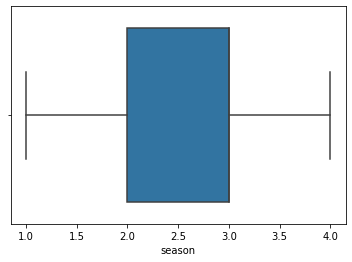

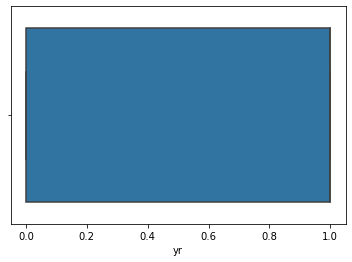

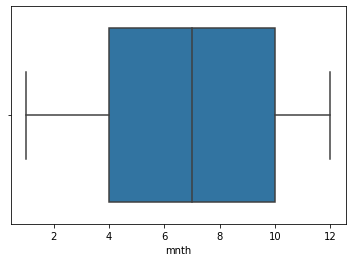

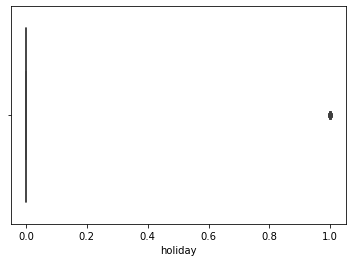

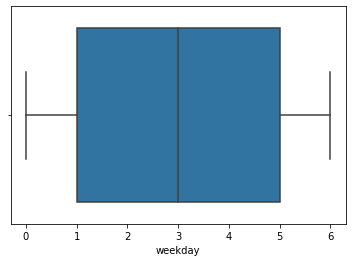

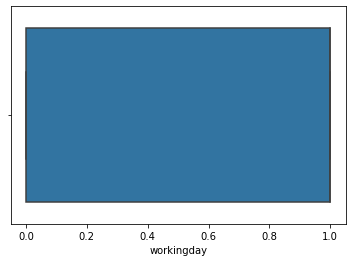

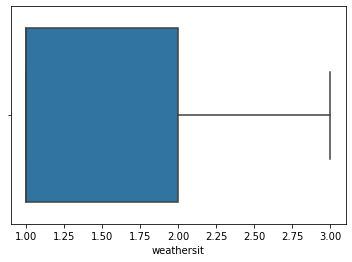

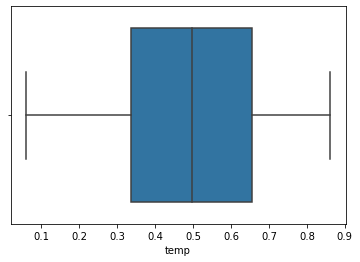

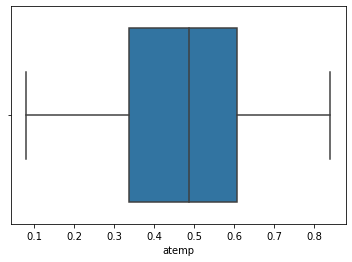

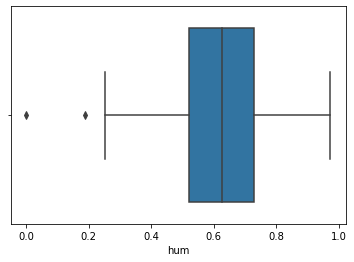

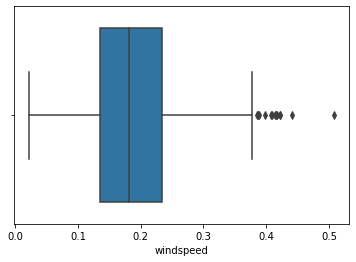

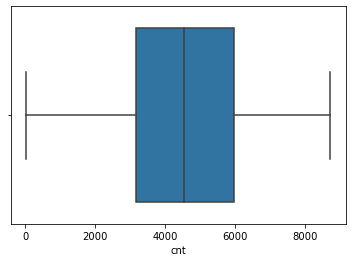

In [14]:
for i in data1.columns:
    sb.boxplot(data1[i])
    plt.show()

In [15]:
from sklearn.utils import shuffle
data1 = shuffle(data1)

In [16]:
data1=data1.reset_index(drop=True)

In [17]:
inp=data1.drop(['cnt'],1)
out=data1['cnt']

In [18]:
import statsmodels.api as sm

In [19]:
inpc=sm.add_constant(inp)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     261.9
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          7.80e-243
Time:                        01:10:21   Log-Likelihood:                -5981.0
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     719   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1469.0031    240.218      6.115      0.000     997.390    1940.616
season       509.7752     54.757      9.310      0.000     402.272     617.278
yr          2040.7034     65.185     31.306      0.000    1912.727    2168.680
mnth         -38.9796     17.079     -2.282      0.023     -72.510      -5.449
holiday     -518.9919    201.040     -2.582      0.010    -913.688    -124.296
weekday       69.0622     16.299      4.237      0.000      37.063     101.061
workingday   120.3570     72.007      1.671      0.095     -21.013     261.727
weathersit  -610.9870     78.363     -7.797      0.000    -764.835    -457.139
temp        2028.9161   1403.671      1.445      0.149    -726.867    4784.699
atemp       3573.2743   1589.389      2.248      0.025     452.877    6693.671
hum        -1018.8616    313.995     -3.245      0.001   -1635.318    -402.405
windspeed  -2557.5691    456.278     -5.605      0.000   -3453.365   -1661.774
==============================================================================
Omnibus:                       88.811   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.069
Skew:                          -0.717   Prob(JB):                     7.92e-40
Kurtosis:                       4.964   Cond. No.                         561.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [20]:
inp1=inp-inp.mean()

In [21]:
inpc=sm.add_constant(inp1)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     261.9
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          7.80e-243
Time:                        01:10:22   Log-Likelihood:                -5981.0
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     719   BIC:                         1.204e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4504.3488     32.267    139.594      0.000    4440.999    4567.699
season       509.7752     54.757      9.310      0.000     402.272     617.278
yr          2040.7034     65.185     31.306      0.000    1912.727    2168.680
mnth         -38.9796     17.079     -2.282      0.023     -72.510      -5.449
holiday     -518.9919    201.040     -2.582      0.010    -913.688    -124.296
weekday       69.0622     16.299      4.237      0.000      37.063     101.061
workingday   120.3570     72.007      1.671      0.095     -21.013     261.727
weathersit  -610.9870     78.363     -7.797      0.000    -764.835    -457.139
temp        2028.9161   1403.671      1.445      0.149    -726.867    4784.699
atemp       3573.2743   1589.389      2.248      0.025     452.877    6693.671
hum        -1018.8616    313.995     -3.245      0.001   -1635.318    -402.405
windspeed  -2557.5691    456.278     -5.605      0.000   -3453.365   -1661.774
==============================================================================
Omnibus:                       88.811   Durbin-Watson:                   2.110
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              180.069
Skew:                          -0.717   Prob(JB):                     7.92e-40
Kurtosis:                       4.964   Cond. No.                         235.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [23]:
vif=pd.DataFrame()
#inpc=sm.add_constant(inp1)
vif['VIF']=[variance_inflation_factor(inp1.values,i) for i in range(inp1.shape[1])]
vif['feature']=inp1.columns
vif=vif.sort_values('VIF',ascending=False)
vif

,VIF,feature
8,64.343361,atemp
7,63.321299,temp
0,3.548413,season
2,3.333672,mnth
9,1.918309,hum
6,1.748741,weathersit
10,1.199259,windspeed
3,1.083126,holiday
5,1.076392,workingday
4,1.024076,weekday


In [24]:
inp1.head(1)

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,-0.49658,-0.500684,-1.519836,-0.028728,0.002736,0.316005,-0.395349,0.047115,0.054046,0.005023,-0.069844


In [25]:
inpc.head(1)

,const,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,1.0,-0.49658,-0.500684,-1.519836,-0.028728,0.002736,0.316005,-0.395349,0.047115,0.054046,0.005023,-0.069844


In [26]:
vif=pd.DataFrame()
inpc=sm.add_constant(inp1)
vif['VIF']=[variance_inflation_factor(inpc.values,i) for i in range(inpc.shape[1])]
vif['feature']=inpc.columns
vif=vif.sort_values('VIF',ascending=False)
vif

,VIF,feature
9,64.343361,atemp
8,63.321299,temp
1,3.548413,season
3,3.333672,mnth
10,1.918309,hum
7,1.748741,weathersit
11,1.199259,windspeed
4,1.083126,holiday
6,1.076392,workingday
5,1.024076,weekday


In [27]:
data1.corr()['cnt']

season        0.406100
yr            0.566710
mnth          0.279977
holiday      -0.068348
weekday       0.067443
workingday    0.061156
weathersit   -0.297391
temp          0.627494
atemp         0.631066
hum          -0.100659
windspeed    -0.234545
cnt           1.000000
Name: cnt, dtype: float64

In [28]:
inp2=inp1.drop('temp',1)
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp2.values,i) for i in range(inp2.shape[1])]
vif['feature']=inp2.columns
vif=vif.sort_values('VIF',ascending=False)
vif

,VIF,feature
0,3.548226,season
2,3.333605,mnth
8,1.912077,hum
6,1.746731,weathersit
7,1.235210,atemp
9,1.167367,windspeed
3,1.081593,holiday
5,1.076160,workingday
4,1.021179,weekday
1,1.020187,yr


In [29]:
inpc=sm.add_constant(inp2)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.800
Model:                            OLS   Adj. R-squared:                  0.797
Method:                 Least Squares   F-statistic:                     287.4
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          1.27e-243
Time:                        01:10:25   Log-Likelihood:                -5982.1
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     720   BIC:                         1.204e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4504.3488     32.292    139.489      0.000    4440.951    4567.746
season       509.2013     54.797      9.292      0.000     401.620     616.782
yr          2041.4586     65.232     31.295      0.000    1913.390    2169.527
mnth         -38.8690     17.092     -2.274      0.023     -72.425      -5.313
holiday     -508.0585    201.050     -2.527      0.012    -902.773    -113.344
weekday       70.3153     16.288      4.317      0.000      38.337     102.293
workingday   121.8868     72.054      1.692      0.091     -19.574     263.348
weathersit  -607.1472     78.377     -7.746      0.000    -761.023    -453.271
atemp       5848.4757    220.382     26.538      0.000    5415.807    6281.145
hum        -1044.7294    313.722     -3.330      0.001   -1660.648    -428.811
windspeed  -2450.0182    450.510     -5.438      0.000   -3334.489   -1565.548
==============================================================================
Omnibus:                       91.531   Durbin-Watson:                   2.112
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.385
Skew:                          -0.722   Prob(JB):                     1.02e-42
Kurtosis:                       5.065   Cond. No.                         51.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [30]:
inp.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed
0,2,0,5,0,3,1,1,0.542500,0.528400,0.632917,0.120642
1,1,1,1,0,0,0,2,0.162500,0.162250,0.796250,0.199638
2,1,0,1,0,5,1,1,0.177500,0.157833,0.457083,0.353242
3,3,1,6,0,0,0,1,0.743333,0.674254,0.479167,0.145525
4,2,0,5,0,4,1,1,0.708333,0.654688,0.677500,0.199642


In [75]:
inp[inp['mnth'] < 4]['mnth']

1      1
2      1
6      1
12     3
15     2
      ..
715    2
723    2
727    3
729    1
730    3
Name: mnth, Length: 181, dtype: int64

In [32]:
#def month_to_quarter(df):
#inp['mnth'].replace(inp[inp['mnth'] < 4]['mnth'],
for ind1 in inp['mnth'].index:
    if inp.loc[ind1, 'mnth'] <=3:            
        inp.loc[ind1, 'quarter'] = 1
    elif ((inp.loc[ind1, 'mnth'] >=4) & (inp.loc[ind1, 'mnth'] <=6)): 
        inp.loc[ind1, 'quarter'] = 2
    elif ((inp.loc[ind1, 'mnth'] >=7) & (inp.loc[ind1, 'mnth'] <=9)): 
        inp.loc[ind1, 'quarter'] = 3
    else:
        inp.loc[ind1, 'quarter'] = 4

In [33]:
inp['quarter'].unique()

array([2., 1., 4., 3.])

In [34]:
inp['day']=inp['weekday'].replace({0:'week_end',6:'week_end',1:'Monday',2:'Tuesday',3:'Wednesday',4:'Thursday',5:'Friday'})

In [35]:
inp3=inp.drop(['mnth','weekday'],1)

In [36]:
inp3=pd.get_dummies(inp3,columns=['quarter','day'])

In [37]:
inp3.head(2)

,season,yr,holiday,workingday,weathersit,temp,atemp,hum,windspeed,quarter_1.0,quarter_2.0,quarter_3.0,quarter_4.0,day_Friday,day_Monday,day_Thursday,day_Tuesday,day_Wednesday,day_week_end
0,2,0,0,1,1,0.5425,0.52840,0.632917,0.120642,0,1,0,0,0,0,0,0,1,0
1,1,1,0,0,2,0.1625,0.16225,0.796250,0.199638,1,0,0,0,0,0,0,0,0,1


In [38]:
inp3=inp3.drop(['quarter_1.0','day_week_end','holiday'],1)

In [39]:
inp4=inp3-inp3.mean()

In [40]:
vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp4.values,i) for i in range(inp4.shape[1])]
vif['feature']=inp4.columns
vif=vif.sort_values('VIF',ascending=False)
vif

,VIF,feature
4,71.109838,temp
5,66.920809,atemp
2,8.523658,workingday
15,6.006413,day_Wednesday
14,5.993552,day_Tuesday
11,5.933618,day_Friday
13,5.915352,day_Thursday
9,5.758248,quarter_3.0
10,5.467830,quarter_4.0
12,4.843941,day_Monday


In [41]:
inp5=inp4.drop(['temp','workingday'],1)

vif=pd.DataFrame()
vif['VIF']=[variance_inflation_factor(inp5.values,i) for i in range(inp5.shape[1])]
vif['feature']=inp5.columns
vif=vif.sort_values('VIF',ascending=False)
vif

,VIF,feature
7,5.453377,quarter_3.0
8,5.432193,quarter_4.0
0,4.228263,season
3,3.388511,atemp
6,3.096124,quarter_2.0
4,1.922152,hum
2,1.743240,weathersit
11,1.294966,day_Thursday
13,1.292599,day_Wednesday
12,1.292598,day_Tuesday


In [42]:
inpc=sm.add_constant(inp5)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.807
Method:                 Least Squares   F-statistic:                     218.7
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          2.19e-247
Time:                        01:10:29   Log-Likelihood:                -5961.8
No. Observations:                 731   AIC:                         1.195e+04
Df Residuals:                     716   BIC:                         1.202e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const          4504.3488     31.495    143.017      0.000    4442.515    4566.183
season          648.9677     58.342     11.123      0.000     534.425     763.510
yr             2056.5210     63.812     32.228      0.000    1931.240    2181.802
weathersit     -599.3369     76.367     -7.848      0.000    -749.267    -449.406
atemp          4805.3158    356.009     13.498      0.000    4106.369    5504.262
hum           -1008.7189    306.786     -3.288      0.001   -1611.027    -406.411
windspeed     -2651.0778    440.837     -6.014      0.000   -3516.566   -1785.590
quarter_2.0     499.4197    128.159      3.897      0.000     247.808     751.031
quarter_3.0    -183.6875    169.469     -1.084      0.279    -516.404     149.029
quarter_4.0    -556.0701    169.140     -3.288      0.001    -888.139    -224.001
day_Friday      256.3686    102.374      2.504      0.012      55.380     457.357
day_Monday      -89.1813    101.905     -0.875      0.382    -289.249     110.887
day_Thursday    167.1739    102.598      1.629      0.104     -34.255     368.603
day_Tuesday      69.0574    102.504      0.674      0.501    -132.188     270.302
day_Wednesday   126.2008    102.504      1.231      0.219     -75.044     327.446
==============================================================================
Omnibus:                      103.983   Durbin-Watson:                   2.084
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              278.106
Skew:                          -0.730   Prob(JB):                     4.07e-61
Kurtosis:                       5.646   Cond. No.                         16.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
while(len(inp2.columns)>0):
    inp_c=sm.add_constant(inp2)
    ols=sm.OLS(out,inp_c)
    mod=ols.fit()
    f=mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        inp2=inp2.drop(f,axis=1)
    else:
        break
print('The final features : ',inp2.columns)

The final features :  Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'atemp',
       'hum', 'windspeed'],
      dtype='object')


In [44]:
inpc=sm.add_constant(inp2)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.799
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     318.2
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          2.87e-244
Time:                        01:10:29   Log-Likelihood:                -5983.5
No. Observations:                 731   AIC:                         1.199e+04
Df Residuals:                     721   BIC:                         1.203e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4504.3488     32.334    139.309      0.000    4440.870    4567.828
season       509.7017     54.867      9.290      0.000     401.984     617.420
yr          2041.0816     65.316     31.249      0.000    1912.849    2169.314
mnth         -39.2280     17.113     -2.292      0.022     -72.824      -5.632
holiday     -592.0094    195.080     -3.035      0.002    -975.002    -209.017
weekday       70.5067     16.309      4.323      0.000      38.488     102.525
weathersit  -598.2989     78.304     -7.641      0.000    -752.029    -444.569
atemp       5868.6082    220.345     26.634      0.000    5436.014    6301.202
hum        -1060.9489    313.980     -3.379      0.001   -1677.373    -444.525
windspeed  -2466.4982    450.986     -5.469      0.000   -3351.900   -1581.096
==============================================================================
Omnibus:                       98.079   Durbin-Watson:                   2.117
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              203.980
Skew:                          -0.773   Prob(JB):                     5.08e-45
Kurtosis:                       5.075   Cond. No.                         51.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
from sklearn.preprocessing import PolynomialFeatures

In [46]:
pf=PolynomialFeatures(degree=2,include_bias=False,interaction_only=True)
inpv2=pf.fit_transform(inp2)

In [47]:
inpv2=pd.DataFrame(inpv2,columns=pf.get_feature_names())

In [48]:
inpv2.head(2)

,x0,x1,x2,x3,x4,x5,x6,x7,x8,x0 x1,...,x4 x5,x4 x6,x4 x7,x4 x8,x5 x6,x5 x7,x5 x8,x6 x7,x6 x8,x7 x8
0,-0.49658,-0.500684,-1.519836,-0.028728,0.002736,-0.395349,0.054046,0.005023,-0.069844,0.248630,...,-0.001082,0.000148,0.000014,-0.000191,-0.021367,-0.001986,0.027613,0.000271,-0.003775,-0.000351
1,-1.49658,0.499316,-5.519836,-0.028728,-2.997264,0.604651,-0.312104,0.168356,0.009152,-0.747266,...,-1.812299,0.935458,-0.504607,-0.027430,-0.188714,0.101797,0.005534,-0.052545,-0.002856,0.001541


In [49]:
inpc=sm.add_constant(inpv2)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.848
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     84.71
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          9.67e-248
Time:                        01:10:30   Log-Likelihood:                -5881.9
No. Observations:                 731   AIC:                         1.186e+04
Df Residuals:                     685   BIC:                         1.207e+04
Df Model:                          45                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       5016.3964     68.725     72.992      0.000    4881.459    5151.333
x0           411.2121     81.227      5.062      0.000     251.727     570.697
x1          2047.8799     60.245     33.992      0.000    1929.593    2166.167
x2             9.4522     27.518      0.343      0.731     -44.577      63.481
x3          -915.5794    285.288     -3.209      0.001   -1475.724    -355.435
x4            53.2294     15.177      3.507      0.000      23.430      83.028
x5          -476.0024     76.898     -6.190      0.000    -626.986    -325.019
x6          4384.2333    334.456     13.109      0.000    3727.552    5040.915
x7         -1058.4936    311.158     -3.402      0.001   -1669.432    -447.555
x8         -2037.1687    436.009     -4.672      0.000   -2893.243   -1181.094
x0 x1        116.1412    119.692      0.970      0.332    -118.866     351.148
x0 x2       -100.1906     16.151     -6.203      0.000    -131.902     -68.479
x0 x3        363.2404    232.422      1.563      0.119     -93.105     819.586
x0 x4         17.4303     25.514      0.683      0.495     -32.664      67.525
x0 x5       -258.3689    142.594     -1.812      0.070    -538.342      21.604
x0 x6      -4081.9768    455.138     -8.969      0.000   -4975.610   -3188.344
x0 x7        991.3786    651.385      1.522      0.128    -287.572    2270.330
x0 x8       -811.3300    618.804     -1.311      0.190   -2026.310     403.650
x1 x2        -34.3460     38.004     -0.904      0.366    -108.965      40.273
x1 x3       -569.5869    385.958     -1.476      0.140   -1327.390     188.216
x1 x4         79.7031     30.142      2.644      0.008      20.521     138.885
x1 x5        -97.0494    145.357     -0.668      0.505    -382.448     188.349
x1 x6       1506.4180    405.256      3.717      0.000     710.725    2302.112
x1 x7      -1277.2746    587.404     -2.174      0.030   -2430.603    -123.946
x1 x8      -1510.5357    842.189     -1.794      0.073   -3164.117     143.046
x2 x3        -90.8336     67.279     -1.350      0.177    -222.931      41.264
x2 x4         -4.5054      7.960     -0.566      0.572     -20.134      11.123
x2 x5         90.2321     44.269      2.038      0.042       3.313     177.151
x2 x6       1090.3466    162.770      6.699      0.000     770.758    1409.935
x2 x7       -463.1608    203.405     -2.277      0.023    -862.532     -63.789
x2 x8        132.3050    188.772      0.701      0.484    -238.337     502.947
x3 x4       -405.1952    162.202     -2.498      0.013    -723.667     -86.723
x3 x5        441.5274    486.654      0.907      0.365    -513.986    1397.041
x3 x6       1776.7683   1343.908      1.322      0.187    -861.905    4415.441
x3 x7       -308.7544   2385.799     -0.129      0.897   -4993.112    4375.603
x3 x8       3254.7755   2886.420      1.128      0.260   -2412.517    8922.068
x4

In [50]:
while(len(inpv2.columns)>0):
    inp_c=sm.add_constant(inpv2)
    ols=sm.OLS(out,inp_c)
    mod=ols.fit()
    f=mod.pvalues[1:].idxmax()
    if mod.pvalues[1:].max()>0.05:
        inpv2=inpv2.drop(f,axis=1)
    else:
        break
print('The final features : ',inpv2.columns)

The final features :  Index(['x0', 'x1', 'x3', 'x4', 'x5', 'x6', 'x7', 'x8', 'x0 x2', 'x0 x6',
       'x1 x3', 'x1 x4', 'x1 x6', 'x1 x7', 'x2 x6', 'x3 x4', 'x5 x7', 'x5 x8'],
      dtype='object')


In [51]:
inpc=sm.add_constant(inpv2)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     210.7
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          1.04e-270
Time:                        01:10:32   Log-Likelihood:                -5895.4
No. Observations:                 731   AIC:                         1.183e+04
Df Residuals:                     712   BIC:                         1.192e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4963.8777     61.546     80.653      0.000    4843.044    5084.712
x0           408.2622     38.681     10.555      0.000     332.319     484.205
x1          2048.2056     59.180     34.610      0.000    1932.017    2164.394
x3         -1039.3891    227.671     -4.565      0.000   -1486.377    -592.402
x4            58.5175     14.723      3.975      0.000      29.611      87.424
x5          -502.4002     73.211     -6.862      0.000    -646.135    -358.665
x6          4504.7009    292.231     15.415      0.000    3930.964    5078.438
x7          -870.5898    286.233     -3.042      0.002   -1432.551    -308.629
x8         -2100.8239    413.771     -5.077      0.000   -2913.181   -1288.467
x0 x2        -90.1189     14.592     -6.176      0.000    -118.767     -61.471
x0 x6      -3852.0991    368.034    -10.467      0.000   -4574.662   -3129.537
x1 x3       -750.5297    355.647     -2.110      0.035   -1448.772     -52.288
x1 x4         74.1124     29.191      2.539      0.011      16.802     131.422
x1 x6       1734.7260    366.993      4.727      0.000    1014.209    2455.243
x1 x7      -1319.4728    427.291     -3.088      0.002   -2158.374    -480.572
x2 x6        926.7117    117.076      7.916      0.000     696.857    1156.566
x3 x4       -399.4679    126.139     -3.167      0.002    -647.116    -151.819
x5 x7      -1668.0785    365.428     -4.565      0.000   -2385.524    -950.633
x5 x8      -3292.4220    662.696     -4.968      0.000   -4593.495   -1991.349
==============================================================================
Omnibus:                       89.892   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.647
Skew:                          -0.704   Prob(JB):                     8.91e-43
Kurtosis:                       5.092   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
inpc=sm.add_constant(inpv2)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.838
Method:                 Least Squares   F-statistic:                     210.7
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          1.04e-270
Time:                        01:10:32   Log-Likelihood:                -5895.4
No. Observations:                 731   AIC:                         1.183e+04
Df Residuals:                     712   BIC:                         1.192e+04
Df Model:                          18                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4963.8777     61.546     80.653      0.000    4843.044    5084.712
x0           408.2622     38.681     10.555      0.000     332.319     484.205
x1          2048.2056     59.180     34.610      0.000    1932.017    2164.394
x3         -1039.3891    227.671     -4.565      0.000   -1486.377    -592.402
x4            58.5175     14.723      3.975      0.000      29.611      87.424
x5          -502.4002     73.211     -6.862      0.000    -646.135    -358.665
x6          4504.7009    292.231     15.415      0.000    3930.964    5078.438
x7          -870.5898    286.233     -3.042      0.002   -1432.551    -308.629
x8         -2100.8239    413.771     -5.077      0.000   -2913.181   -1288.467
x0 x2        -90.1189     14.592     -6.176      0.000    -118.767     -61.471
x0 x6      -3852.0991    368.034    -10.467      0.000   -4574.662   -3129.537
x1 x3       -750.5297    355.647     -2.110      0.035   -1448.772     -52.288
x1 x4         74.1124     29.191      2.539      0.011      16.802     131.422
x1 x6       1734.7260    366.993      4.727      0.000    1014.209    2455.243
x1 x7      -1319.4728    427.291     -3.088      0.002   -2158.374    -480.572
x2 x6        926.7117    117.076      7.916      0.000     696.857    1156.566
x3 x4       -399.4679    126.139     -3.167      0.002    -647.116    -151.819
x5 x7      -1668.0785    365.428     -4.565      0.000   -2385.524    -950.633
x5 x8      -3292.4220    662.696     -4.968      0.000   -4593.495   -1991.349
==============================================================================
Omnibus:                       89.892   Durbin-Watson:                   2.102
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              193.647
Skew:                          -0.704   Prob(JB):                     8.91e-43
Kurtosis:                       5.092   Cond. No.                         113.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [53]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
lr=LinearRegression()
rfe=RFE(estimator=lr,n_features_to_select=1)
rfe_mod=rfe.fit(inpv2,out)
rfe_mod.ranking_

array([15,  7, 10, 18, 12,  1,  4,  3, 16,  5, 11, 17,  6,  9, 14, 13,  8,
        2])

In [54]:
rank=pd.DataFrame()
rank['Features']=inpv2.columns
rank['RANK']=rfe_mod.ranking_

In [55]:
rank.sort_values('RANK')

,Features,RANK
5,x6,1
17,x5 x8,2
7,x8,3
6,x7,4
9,x0 x6,5
12,x1 x6,6
1,x1,7
16,x5 x7,8
13,x1 x7,9
2,x3,10


In [56]:
inp2.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'weathersit', 'atemp',
       'hum', 'windspeed'],
      dtype='object')

In [57]:
inp2['weathersit_windspeed']=inp2['weathersit']*inp2['windspeed']

In [58]:
inp2['season_atemp']=inp2['season']*inp2['atemp']

In [59]:
inp2_new=inp2.drop(['season','weathersit'],1)

In [60]:
inpc=sm.add_constant(inp2)
ols=sm.OLS(out,inpc)
ols_mod=ols.fit()
ols_mod.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    cnt   R-squared:                       0.813
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     284.0
Date:                Tue, 24 Nov 2020   Prob (F-statistic):          5.07e-253
Time:                        01:10:36   Log-Likelihood:                -5957.1
No. Observations:                 731   AIC:                         1.194e+04
Df Residuals:                     719   BIC:                         1.199e+04
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                 4602.3809     34.517    133.336      0.000    4534.614    4670.148
season                 409.9420     55.544      7.380      0.000     300.894     518.990
yr                    1997.3362     63.366     31.521      0.000    1872.932    2121.740
mnth                   -50.4746     16.629     -3.035      0.002     -83.122     -17.827
holiday               -562.8870    188.469     -2.987      0.003    -932.902    -192.872
weekday                 68.5651     15.784      4.344      0.000      37.576      99.554
weathersit            -559.4606     75.813     -7.379      0.000    -708.302    -410.620
atemp                 5758.4777    213.461     26.977      0.000    5339.396    6177.559
hum                  -1051.0098    305.480     -3.441      0.001   -1650.749    -451.271
windspeed            -2547.6613    437.963     -5.817      0.000   -3407.501   -1687.821
weathersit_windspeed -2858.0593    712.021     -4.014      0.000   -4255.948   -1460.170
season_atemp         -1504.7934    235.213     -6.398      0.000   -1966.579   -1043.008
==============================================================================
Omnibus:                       89.801   Durbin-Watson:                   2.115
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              173.901
Skew:                          -0.740   Prob(JB):                     1.73e-38
Kurtosis:                       4.877   Cond. No.                         81.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [61]:
inp3.head(2)

,season,yr,workingday,weathersit,temp,atemp,hum,windspeed,quarter_2.0,quarter_3.0,quarter_4.0,day_Friday,day_Monday,day_Thursday,day_Tuesday,day_Wednesday
0,2,0,1,1,0.5425,0.52840,0.632917,0.120642,1,0,0,0,0,0,0,1
1,1,1,0,2,0.1625,0.16225,0.796250,0.199638,0,0,0,0,0,0,0,0


In [62]:
# from sklearn.preprocessing import StandardScaler
# sc=StandardScaler()
# data_sc=sc.fit_transform(inp3)
# data_sc=pd.DataFrame(data_sc,columns=inp3.columns)
# data_sc.head(3)

In [63]:
from sklearn.model_selection import cross_val_score

In [64]:
mod_lr=LinearRegression()
res=cross_val_score(mod_lr,inp4,out,cv=5,scoring='r2')
rmse=np.sqrt(abs(res))
be=1-np.mean(rmse)
ve=np.std(rmse)
cve=np.std(rmse)/np.mean(rmse)
res_lr=[be,ve,cve]

In [65]:
res_lr

[0.10801843120486043, 0.03147695426923823, 0.03528879448905688]

In [66]:
from sklearn.linear_model import Ridge, Lasso, ElasticNet

In [67]:
inp3.head(2)

,season,yr,workingday,weathersit,temp,atemp,hum,windspeed,quarter_2.0,quarter_3.0,quarter_4.0,day_Friday,day_Monday,day_Thursday,day_Tuesday,day_Wednesday
0,2,0,1,1,0.5425,0.52840,0.632917,0.120642,1,0,0,0,0,0,0,1
1,1,1,0,2,0.1625,0.16225,0.796250,0.199638,0,0,0,0,0,0,0,0


In [68]:
mod_rid=Ridge(alpha=5)
res=cross_val_score(mod_rid,inp4,out,cv=5,scoring='r2')
rmse=np.sqrt(abs(res))
be=1-np.mean(rmse)
ve=np.std(rmse)
cve=np.std(rmse)/np.mean(rmse)
res_rid_1=[be,ve,cve]
res_rid_1

[0.11024152094775164, 0.03794679717702393, 0.04264842434257445]

In [69]:
mod_las=Lasso(alpha=0.1,max_iter=5000)
res=cross_val_score(mod_las,inp4,out,cv=5,scoring='r2')
rmse=np.sqrt(abs(res))
be=1-np.mean(rmse)
ve=np.std(rmse)
cve=np.std(rmse)/np.mean(rmse)
res_las_1=[be,ve,cve]
res_las_1

[0.10730418293362542, 0.031830508073898096, 0.03565661165356553]

In [70]:
mod_enet=ElasticNet(alpha=0.005,l1_ratio=0.4)
res=cross_val_score(mod_enet,inp4,out,cv=5,scoring='r2')
rmse=np.sqrt(abs(res))
be=1-np.mean(rmse)
ve=np.std(rmse)
cve=np.std(rmse)/np.mean(rmse)
res_enet_1=[be,ve,cve]
res_enet_1

[0.10688128572987776, 0.035542556610393204, 0.03979600476677887]

In [71]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(inp4,out,test_size=0.3,random_state=48)

In [72]:
mod_lr=LinearRegression(normalize=True)
mod_lr.fit(inp4,out)

coef1=pd.DataFrame()
coef1['LR']=mod_lr.coef_

mod_rid=Ridge(alpha=5,normalize=True)
mod_rid.fit(inp4,out)
coef1['Ridge_5']=mod_rid.coef_

mod_rid=Ridge(alpha=10,normalize=True)
mod_rid.fit(inp4,out)
coef1['Ridge_10']=mod_rid.coef_

mod_las=Lasso(alpha=0.1,normalize=True)
mod_las.fit(inp4,out)
coef1['Lasso_1']=mod_las.coef_

mod_enet=ElasticNet(alpha=0.005,l1_ratio=0.4,normalize=True)
mod_enet.fit(inp4,out)
coef1['Lasso_1']=mod_las.coef_

In [73]:
coef1.index=inp4.columns
coef1

,LR,Ridge_5,Ridge_10,Lasso_1
season,635.198362,100.385788,58.485468,618.599747
yr,2054.551483,358.079387,197.011087,2050.519747
workingday,598.871390,35.969274,20.951855,375.941657
weathersit,-609.173580,-153.335259,-88.783326,-607.405492
temp,2144.638229,848.282077,517.580180,1982.533804
atemp,2523.539227,960.917942,585.575612,2645.760576
hum,-992.295600,-243.638194,-130.807849,-969.723546
windspeed,-2764.918026,-797.871204,-473.176991,-2716.186866
quarter_2.0,481.338024,138.919446,79.199103,513.260750
quarter_3.0,-221.667309,172.557731,112.246262,-156.379305
